# Building a convex hull from an Atoms Database

If you have a bunch of structures stored as a cfg file

In [1]:
from mlip import cfg_to_db
from ase.db import connect
from pymatgen.core.periodic_table import Element
from ase.db import connect  # api for connecting to the atoms database
import pymatgen.analysis.phase_diagram as PD

In [2]:
#input_cfg = "./it25/relaxed54.cfg"
input_cfg = "special.cfg"
#input_cfg="empty.cfg"
#output_path = "54relaxed1.db"
output_path = "cfgs.db"
cfg_to_db(input_cfg, output=output_path, species_map={0:"Hf",1:"Ni",2:"Ti"})

In [3]:
db = connect(output_path)

In [4]:
structs = [struct.toatoms() for struct in db.select()]

In [5]:
structs[1]

Atoms(symbols='HfTi', pbc=True, cell=[[2.166965891523427, 2.1669658915234273, -2.895658628911801e-16], [-2.166965891523427, 2.1669658915234273, -5.135779235651769e-17], [-9.967428622011559e-17, 1.3464240753281387e-16, 4.247423080496369]], calculator=SinglePointCalculator(...))

In [6]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

In [7]:
energies = [struct.energy/struct.natoms for struct in db.select()]

In [8]:
energies[0]

-9.853857796267684

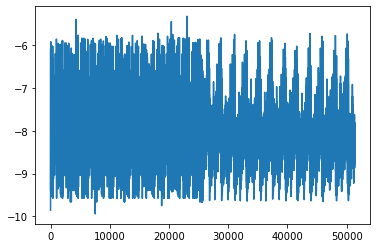

In [9]:
plt.plot(energies)

In [10]:
minen = min(energies)
energies.index(minen)

7551

In [11]:
#energies[11835]=0

In [12]:

#from pymatgen import Element


In [13]:
# open a connection to the atoms database
db = connect(output_path)

## Atoms database usage

In [14]:
A = db[10]
print(A)  # selects the 10th object in the databse

<AtomsRow: formula=Hf2Ti2, keys=>


#### Access the ASE Atoms object data from database rows

print(A.get_positions())

#### Filter database values

#### Select multiple rows from the database

In [15]:
# nickel_list = db.select("Ni>0")
# for struct in nickel_list:
#     print(struct)

### PyMatGen phase diagram needs formulas and energies

#### Extract just formulas and energies and create a list of PDEntry values (required for PD code)

for struct in db.select('energy<0'):
    print(struct.energy)

In [19]:
# Using list comprehension
# Usually a good bit faster than a for loop, but harder to read and debug

# OLD CODE IS TOO MEMORY INTENSIVE
#data = [PD.PDEntry(struct.formula, struct.energy) for struct in db.select()]

# Just storing the phase diagram object instead of the data list as well is much more efficient
pd = PD.PhaseDiagram([PD.PDEntry(struct.formula, struct.energy, attribute=struct.id) 
                      for struct in db.select('energy<0')])



In [18]:
len(db)

51394

### Plotting the phase diagram

### We need to record and recall the database entry in the HfNiTi 
We can set a dictionary entry called "attribute" for each of the PDEntry objects.
When we're initializing the PD that information is preserved, which means we
can recall the database ID of each structure once the phase diagram has been 
produced

In [ ]:
#stables = pd.get_stable_entries_normed()

#for struct in stables:
#    print(struct.attribute)

In [ ]:
#mtp_db_ID = [struct.attribute for struct in pd.get_stable_entries_normed()]

In [ ]:
# hull_db = connect('hull_mtp.db')

# for ID in mtp_db_ID:
#     struct = db.get(ID)
#     hull_db.write(struct)

In [ ]:
#pd = PD.PhaseDiagram(data)  # creates a phase diagram object

In [20]:
# Print out which structures lie on the convex hull
# pd = data
pd.get_composition_chempots

<bound method BasePhaseDiagram.get_composition_chempots of Hf-Ti-Ni phase diagram
8 stable phases: 
HfNi, Ti, HfNi3, Hf2Ni, Hf, Ni, TiNi7, TiNi3>

In [21]:
pd.stable_entries

{PDEntry : Hf2 Ni6 with energy = -57.1346,
 PDEntry : Hf2 with energy = -19.8848,
 PDEntry : Hf4 Ni2 with energy = -52.9520,
 PDEntry : Hf4 Ni4 with energy = -65.5332,
 PDEntry : Ni2 with energy = -10.9063,
 PDEntry : Ni6 Ti2 with energy = -52.6248,
 PDEntry : Ni7 Ti1 with energy = -48.1667,
 PDEntry : Ti2 with energy = -16.5097}

In [22]:
from matplotlib import pyplot as plt
# fig = plt.figure()

elements = [Element("Hf"),Element("Ni"),Element("Ti")]
pd_plot = PD.PDPlotter(pd, show_unstable=.02)  # , elements=elements)#, show_unstable=.02)
# chull = pd_plot.get_plot(label_stable=False, label_unstable=False)


# chull.title("Test")
# chull.tight_layout()
# chull.savefig('chull.png', dpi=500, pad_inches=0.1 )
# pd_plot_data

# pd_plot.show()

#### Create a 3d Plot

In [23]:

pd_plot.get_plot()

In [24]:
len(pd_plot.pd_plot_data[2])

50587

from pymatgen.core import Composition
comp = Composition("Ni3Ti")
pd_plot.plot_element_profile(Element("Hf"),comp)

pd_plot.get_chempot_range_map_plot([Element['Hf'],Element['Ti']])
pd_plot.get_chempot_range_map_plot([Element['Hf'],Element['Ni']])
pd_plot.get_chempot_range_map_plot([Element['Ni'],Element['Ti']])

pd_plot.get_contour_pd_plot()

In [25]:
pd.get_e_above_hull(pd.all_entries[1])

0

In [26]:
print(pd.all_entries[1])

PDEntry : Ni2 with energy = -10.9063


pd.as_dict(pd.stable_entries)

## What if we want to know the structures close to the hull?

In [27]:
pd_plot = PD.PDPlotter(pd, show_unstable=0.05)
pd_plot.show(label_unstable=False) # If you don't set label_unstable=False, you're gonna have a bad time

In [28]:
a=PD.PDEntry("Ni2Ti2",-39.24)

In [29]:
counter=0
for struct in pd.all_entries:
    if pd.get_e_above_hull(struct)==0:
        print(counter)
    counter+=1
print("suppling")

1
4
483
668
2100
2313
2796
13388
suppling


In [30]:
print(counter)

51394


## How to save a figure
#### If you're working in a terminal environment and you can't view the image, use this command

pd_plot.write_image("HfNiTi.svg", image_format="svg", label_unstable=False)  # You need to pass in pd.show() parameters